In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-06-19 07:38:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  51.0MB/s    in 3.8s    

2019-06-19 07:38:35 (51.0 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-06-19 07:38:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/

we downloaded the data  divided into 2 zipped files [rps-test-set.zip , rps.zip] , and each zip file contain 3 files (rock ,paper ,scissors)
first thing to do ,to unzip these files to certain directory"here we unzipped in the same directories /tmp/file"

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [0]:
#create paths for every folder in the training to use later in generators.
rock_dir     =  os.path.join('/tmp/rps/rock')
paper_dir    = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')


In [4]:
#count the values for every category in the rps folder
print ("total training rocks in training images : " , len(os.listdir(rock_dir)))
print ("total training papers in training images : " , len(os.listdir(paper_dir)))
print ("total training scissors in training images : " , len(os.listdir(scissors_dir)))

total training rocks in training images :  840
total training papers in training images :  840
total training scissors in training images :  840


In [5]:
#print some values for each categories t make sure that we are right 
rock_files = os.listdir(rock_dir)
print (rock_files[:10])

paper_files = os.listdir(paper_dir)
print (paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print (scissors_files[:10])

['rock06ck02-110.png', 'rock01-033.png', 'rock02-003.png', 'rock05ck01-046.png', 'rock02-028.png', 'rock04-001.png', 'rock05ck01-117.png', 'rock07-k03-060.png', 'rock06ck02-042.png', 'rock02-042.png']
['paper05-027.png', 'paper07-084.png', 'paper03-096.png', 'paper06-005.png', 'paper01-091.png', 'paper01-078.png', 'paper07-024.png', 'paper04-073.png', 'paper04-072.png', 'paper07-116.png']
['scissors04-014.png', 'scissors01-093.png', 'testscissors01-061.png', 'scissors01-101.png', 'scissors02-099.png', 'scissors03-082.png', 'testscissors03-091.png', 'testscissors03-057.png', 'scissors04-091.png', 'testscissors03-098.png']


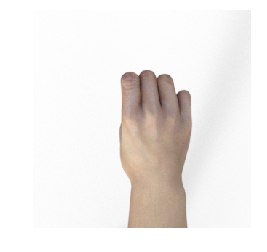

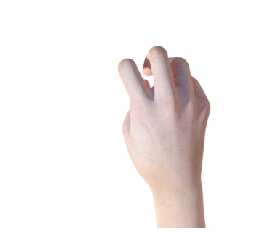

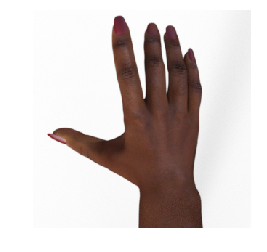

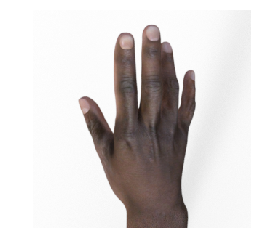

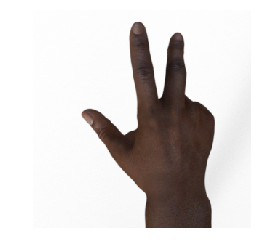

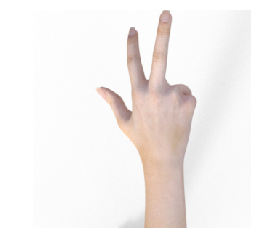

In [6]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [7]:
from  keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator (rescale=1./255,rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      horizontal_flip=True,shear_range=0.2,
                                      zoom_range=0.2,fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [9]:
train_dir            = "/tmp/rps"
validate_dir         = "/tmp/rps-test-set"
train_generator      = train_datagen.flow_from_directory(train_dir , target_size=(150,150) ,
                                                    class_mode= 'categorical')
validation_generator = validation_datagen.flow_from_directory(validate_dir , target_size=(150,150) ,
                                                    class_mode= 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [0]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential ([
    tf.keras.layers.Conv2D(64 ,(3,3) , activation='relu' , input_shape =(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64 ,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128 ,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128 ,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    
])

W0619 07:55:47.868582 139798350489472 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [19]:
model.compile(loss = 'categorical_crossentropy' , optimizer='rmsprop' ,metrics=['accuracy'])
history = model.fit_generator(train_generator ,epochs=25 , validation_data= validation_generator ,verbose=1)
model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 27s 338ms/step - loss: 0.0679 - acc: 0.9849 - val_loss: 0.4919 - val_acc: 0.8871
Epoch 2/25
79/79 [==============================] - 25s 314ms/step - loss: 0.0501 - acc: 0.9881 - val_loss: 0.0312 - val_acc: 0.9812
Epoch 3/25
79/79 [==============================] - 25s 312ms/step - loss: 0.0459 - acc: 0.9885 - val_loss: 0.0611 - val_acc: 0.9731
Epoch 4/25
79/79 [==============================] - 25s 314ms/step - loss: 0.0568 - acc: 0.9877 - val_loss: 0.0691 - val_acc: 0.9651
Epoch 5/25
79/79 [==============================] - 25s 313ms/step - loss: 0.0376 - acc: 0.9921 - val_loss: 0.4034 - val_acc: 0.8978
Epoch 6/25
79/79 [==============================] - 25s 315ms/step - loss: 0.0526 - acc: 0.9889 - val_loss: 0.2150 - val_acc: 0.9220
Epoch 7/25
79/79 [==============================] - 25s 313ms/step - loss: 0.0382 - acc: 0.9901 - val_loss: 0.4602 - val_acc: 0.8898
Epoch 8/25
79/79 [==============================] - 25s 314ms/step - 

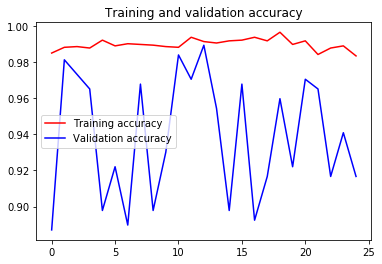

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()